In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [298]:
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [299]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [300]:
diabetes_df = pd.read_csv(r"C:\Users\bisha\Desktop\Diabetes-Prediction-Using-Machine-Learning-master\dataset.csv")


In [301]:
diabetes_df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [302]:
#Exploratory Data Analysis (EDA)

In [303]:
diabetes_df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [304]:
#Information about the dataset

In [305]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [306]:
#To know more about the dataset

In [307]:
diabetes_df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [308]:
#To know more about the dataset with transpose – here T is for the transpose 

In [309]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.0000
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.0000
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.0000
thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.0000
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.0000
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.1000
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.4200
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.0000
skin,768.0,0.809136,0.628517,0.000,0.00000,0.9062,1.26080,3.9006


In [310]:
#Now let’s check that if our dataset have null values or not

In [311]:
diabetes_df.isnull().head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [312]:
#Now let’s check the number of null values our dataset has.

In [313]:
diabetes_df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [314]:
import pandas as pd
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['glucose_conc','diastolic_bp','thickness','insulin','bmi']] = diabetes_df_copy[['glucose_conc','diastolic_bp','thickness','insulin','bmi']].replace(0,pd.NA)

In [315]:
#Data Visualization

#Plotting the data distribution plots before removing null values 

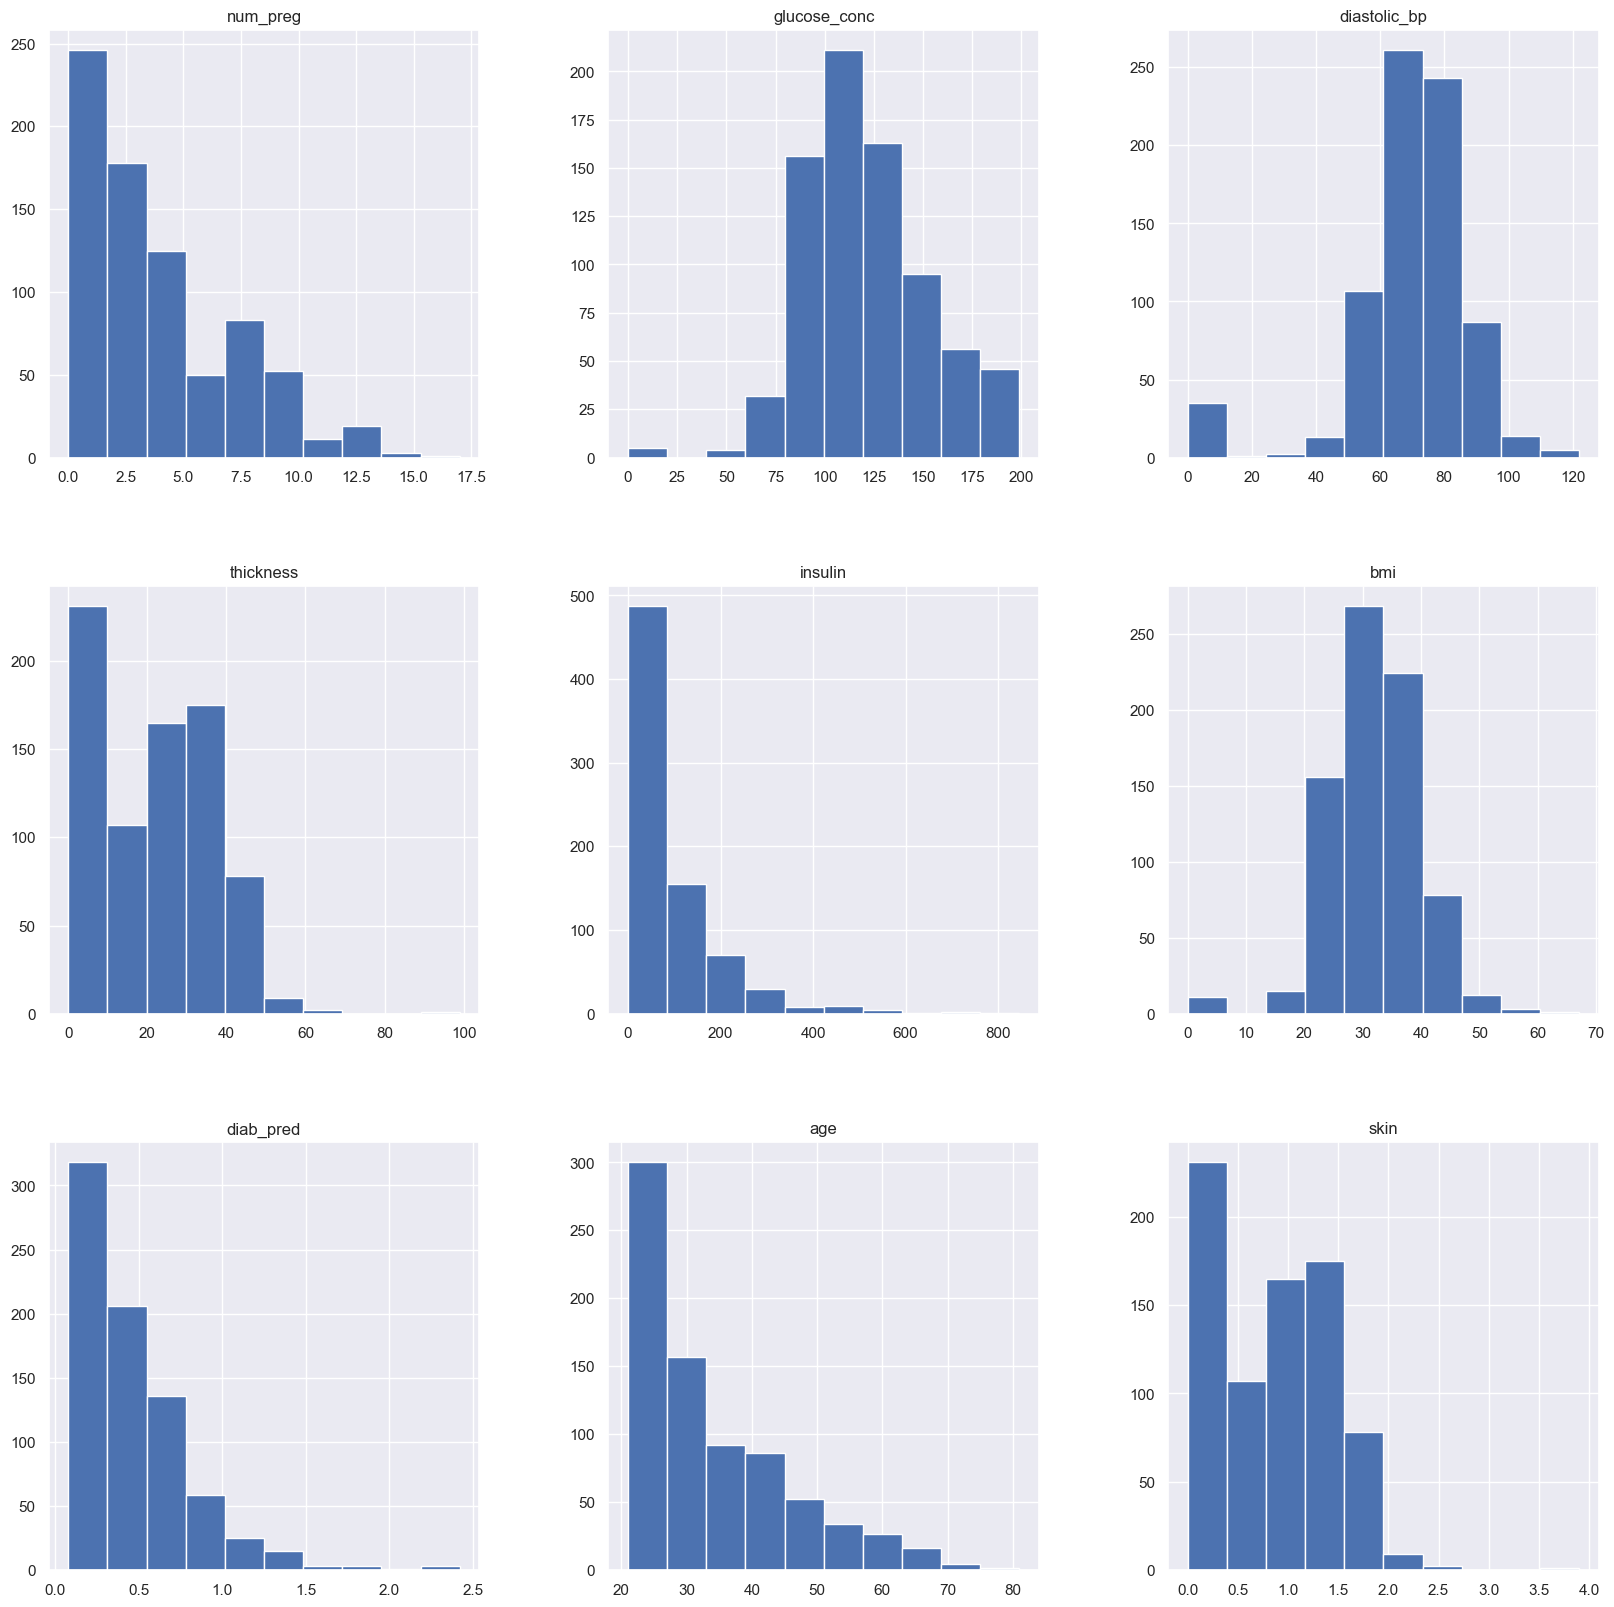

In [316]:
p = diabetes_df.hist(figsize = (20,20))

In [317]:
#Now we will be imputing the mean value of the column to each missing value of that particular column.

In [318]:
diabetes_df_copy['glucose_conc'].fillna(diabetes_df_copy['glucose_conc'].mean(), inplace = True)
diabetes_df_copy['diastolic_bp'].fillna(diabetes_df_copy['diastolic_bp'].mean(), inplace = True)
diabetes_df_copy['thickness'].fillna(diabetes_df_copy['thickness'].median(), inplace = True)
diabetes_df_copy['insulin'].fillna(diabetes_df_copy['insulin'].median(), inplace = True)
diabetes_df_copy['bmi'].fillna(diabetes_df_copy['bmi'].median(), inplace = True)

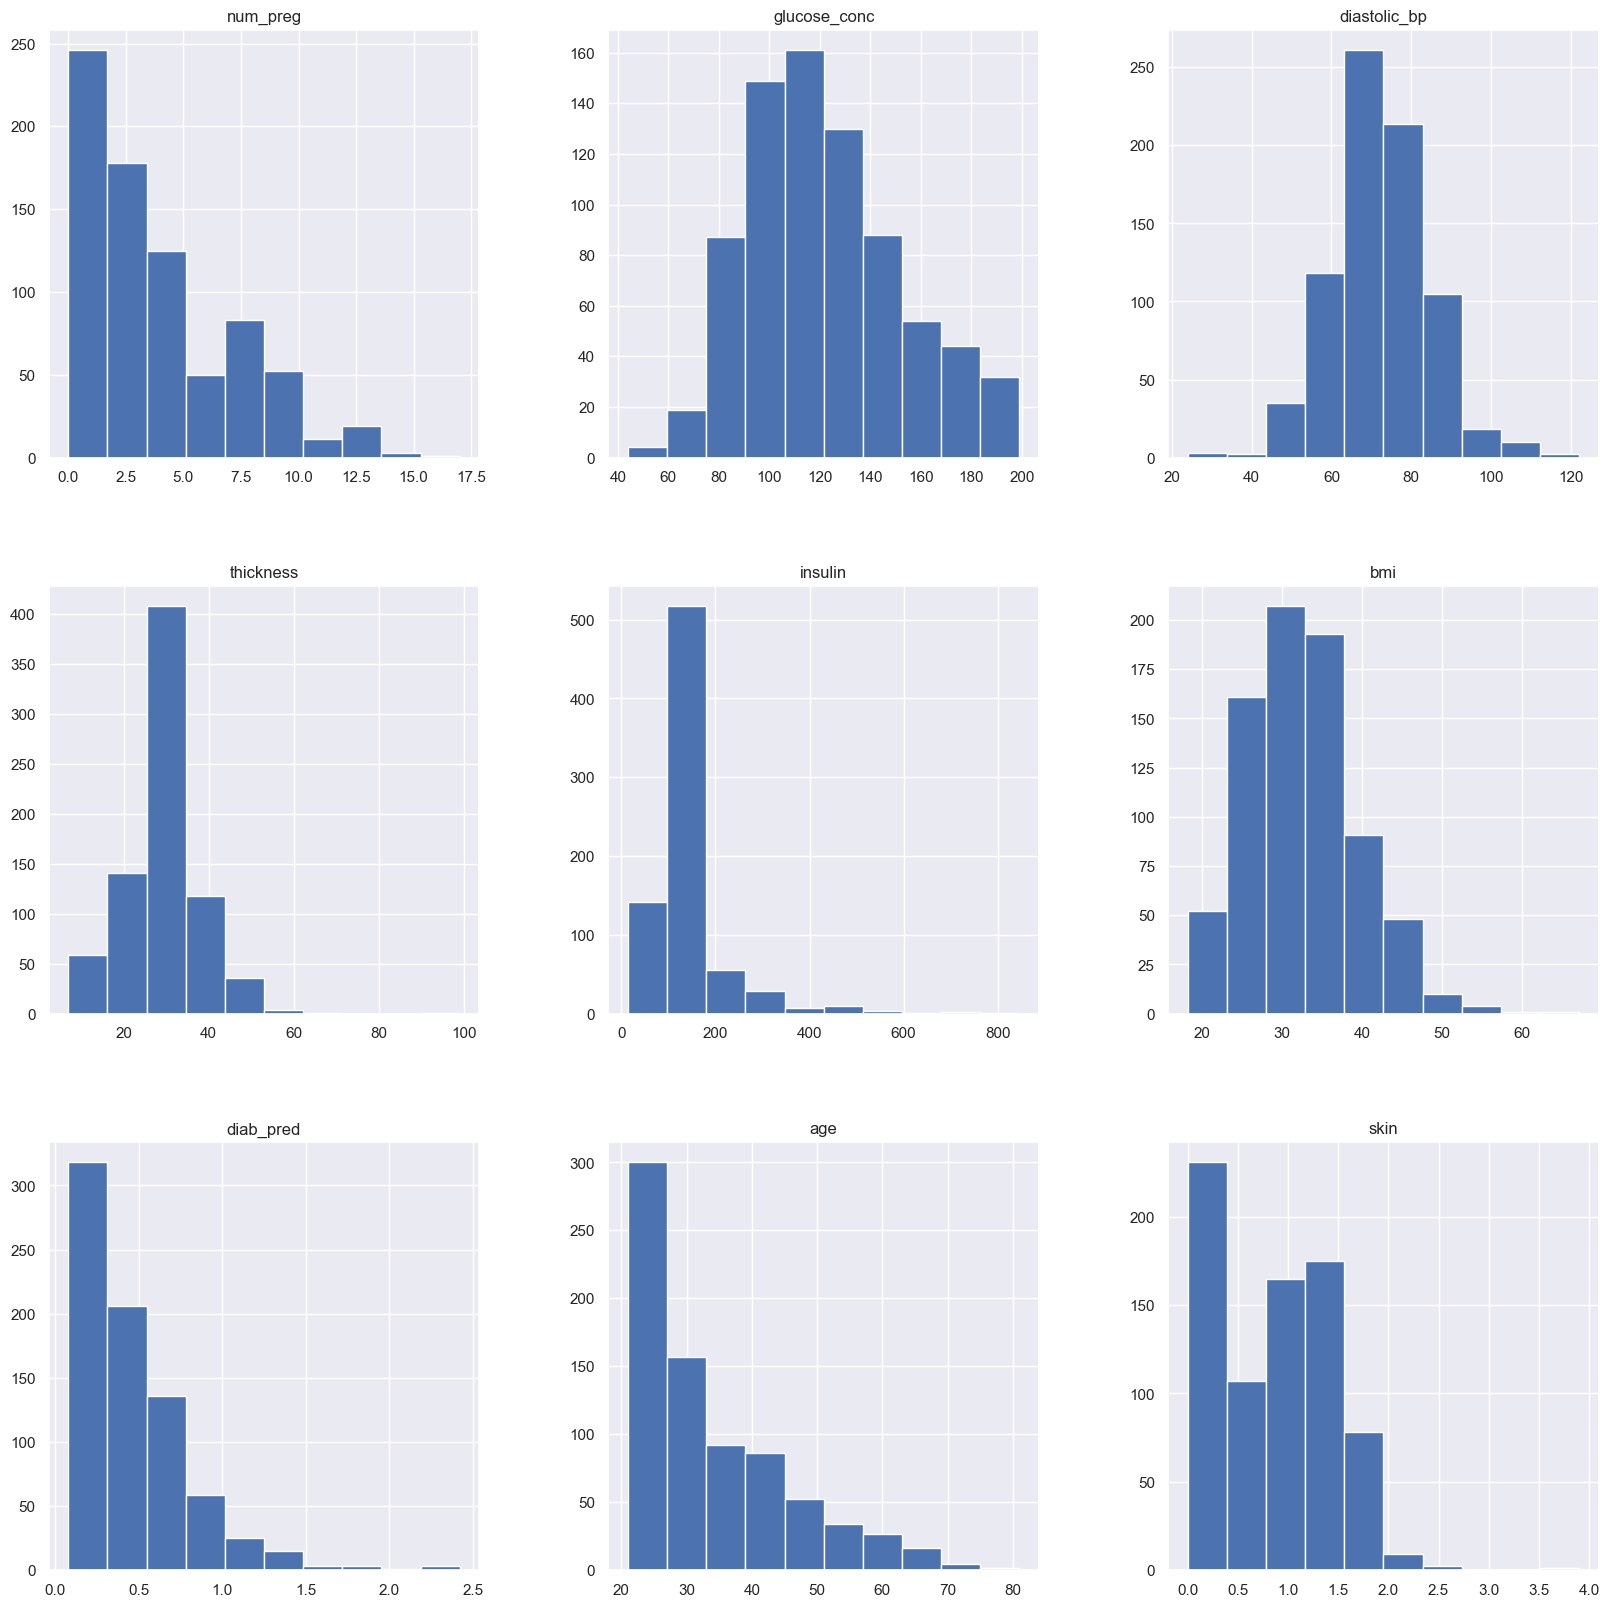

In [319]:
#Plotting the distributions after removing the NAN values.

p = diabetes_df_copy.hist(figsize = (20,20))

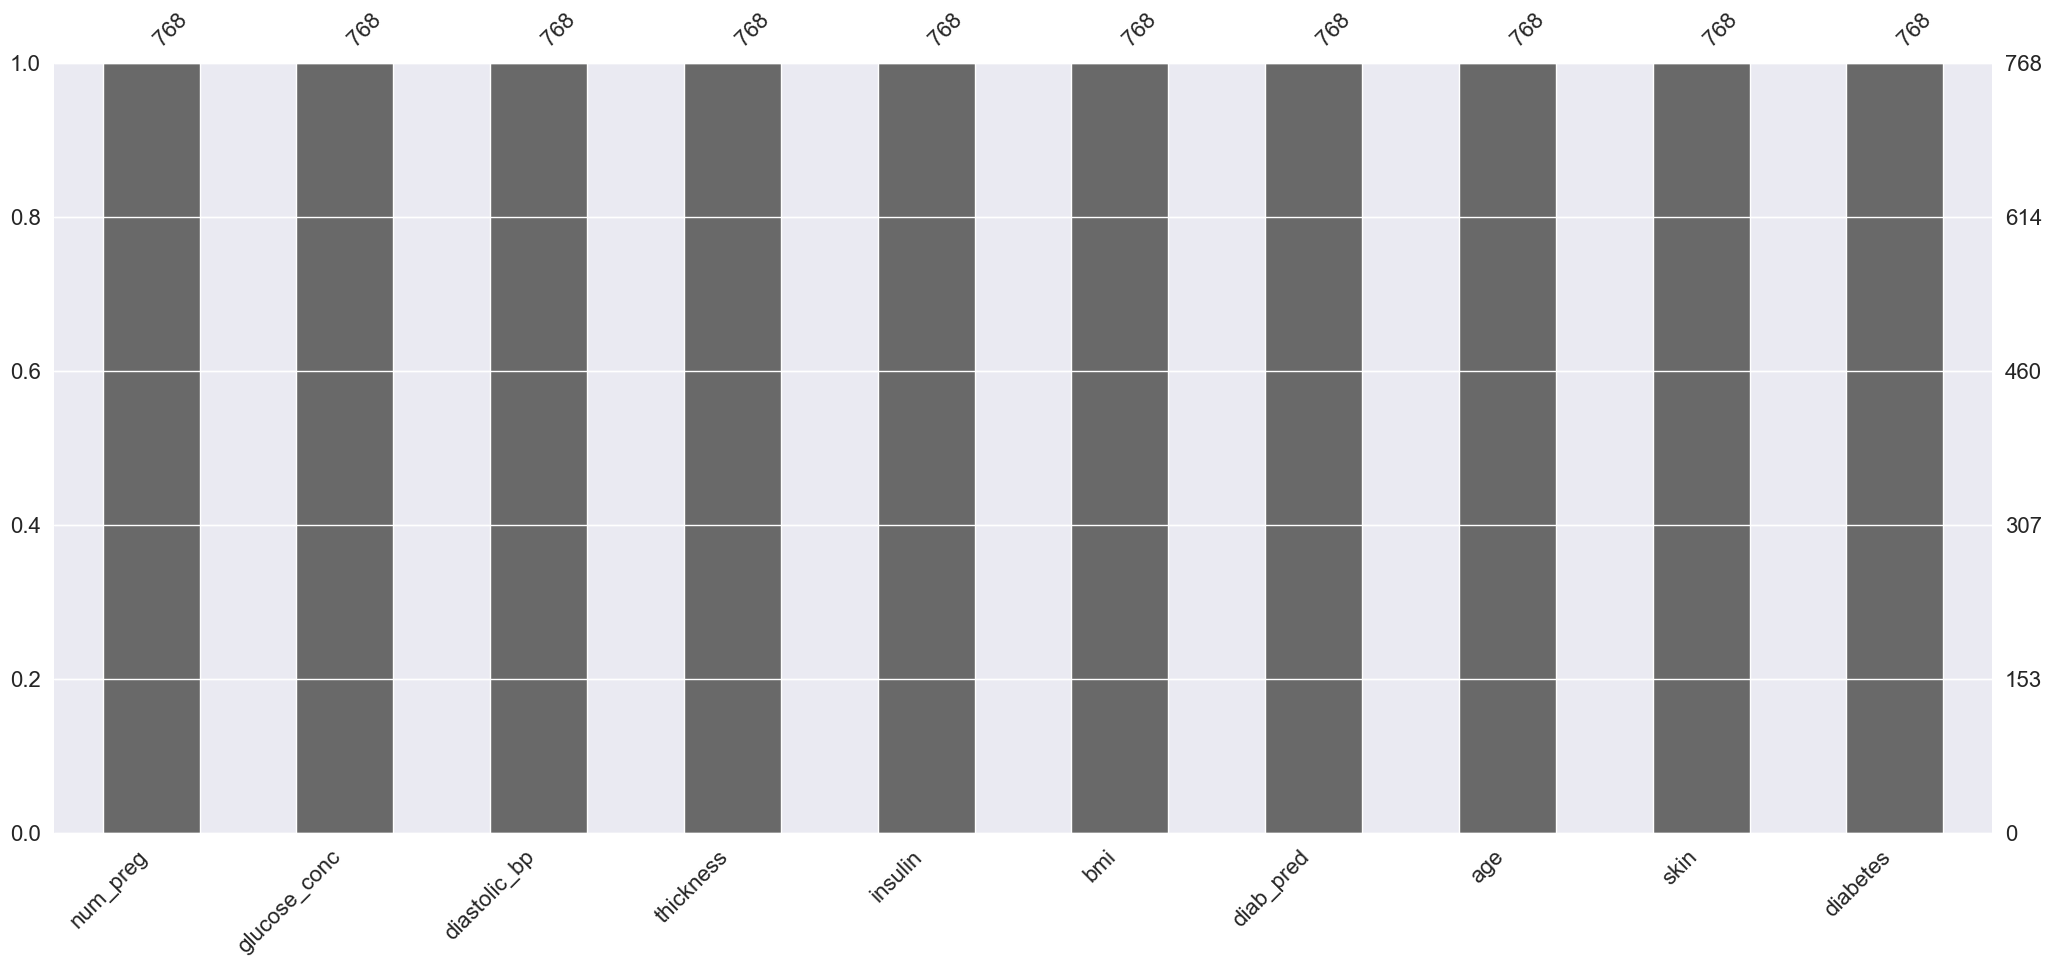

In [320]:
#Plotting Null Count Analysis Plot

p = msno.bar(diabetes_df)

In [321]:
#Inference: Now in the above graph also we can clearly see that there are no null values in the dataset.

diabetes
False    500
True     268
Name: count, dtype: int64


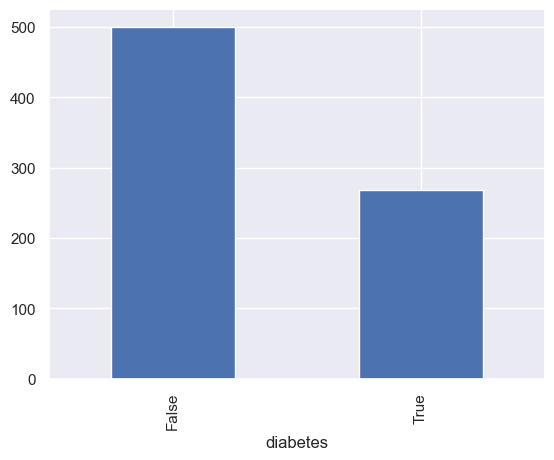

In [322]:
#Now, let’s check that how well our diabetes column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["diabetes"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.diabetes.value_counts())
p=diabetes_df.diabetes.value_counts().plot(kind="bar")

In [323]:
#Inference: Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

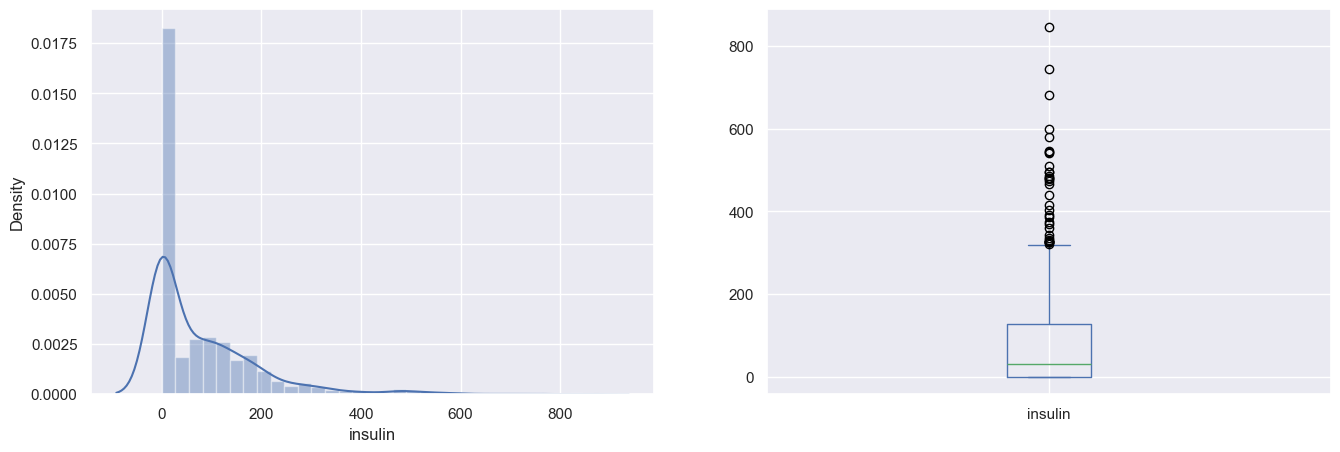

In [324]:
plt.subplot(121), sns.distplot(diabetes_df['insulin'])
plt.subplot(122), diabetes_df['insulin'].plot.box(figsize=(16,5))
plt.show()

In [325]:
#Inference: That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

In [326]:
#Correlation between all the features

#Correlation between all the features before cleaning

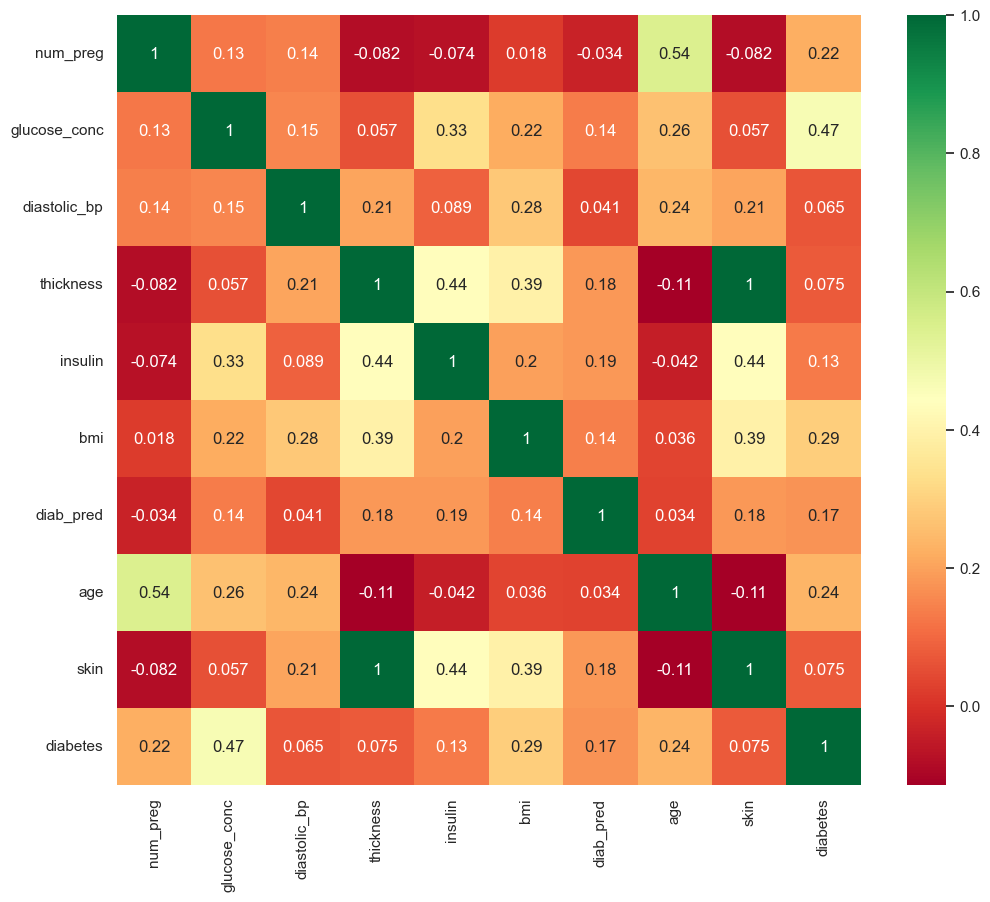

In [327]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [328]:
#Scaling the Data

#Before scaling down the data let’s have a look into it

diabetes_df_copy.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1.3790,True
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,1.1426,False
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,0.0000,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,True


In [329]:
#After Standard scaling

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["diabetes"],axis = 1),), columns=['num_preg', 
'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'skin', 'age'])
X.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,skin,age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995,0.907270
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0.530902
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,-1.288212
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0.154533
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,0.907270


In [330]:
#That’s how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result.

In [331]:
#Model Building

In [332]:
#Splitting the dataset

X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']

In [333]:
#Now we will split the data into training and testing data using the train_test_split function

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [334]:
#Random Forest

#Building the model using RandomForest

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [335]:
#Getting the accuracy score for Random Forest
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.760


In [336]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [337]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgb.set_config(verbosity=0)


In [338]:
import xgboost
classifier=xgboost.XGBClassifier()

In [339]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [340]:
import datetime


def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [341]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 3.43 seconds.


In [342]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [343]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [344]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)


In [345]:
score

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [346]:
score.mean()

np.float64(nan)

In [347]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [348]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [349]:
best_model = grid_search.fit(X_train,y_train)

In [350]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 16


In [351]:
#Predict testing set
knn_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

       False       0.79      0.88      0.83       162
        True       0.74      0.59      0.65        92

    accuracy                           0.78       254
   macro avg       0.76      0.73      0.74       254
weighted avg       0.77      0.78      0.77       254


 F1:
 0.6545454545454545

 Precision score is:
 0.7397260273972602

 Recall score is:
 0.5869565217391305

 Confusion Matrix:



<Axes: >

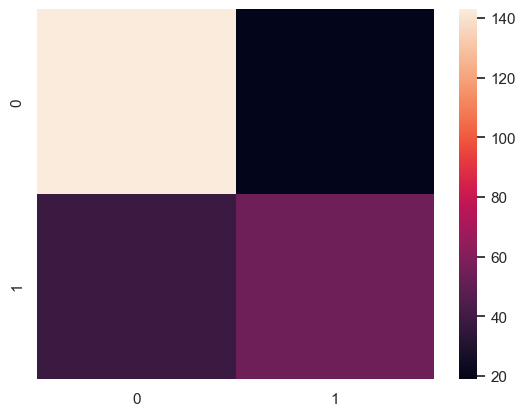

In [352]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

In [353]:
#Naive Bayes

In [354]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [355]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [356]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

       False       0.77      0.88      0.82       162
        True       0.72      0.53      0.61        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254


 F1:
 0.6125

 Precision score is:
 0.7205882352941176

 Recall score is:
 0.532608695652174

 Confusion Matrix:



<Axes: >

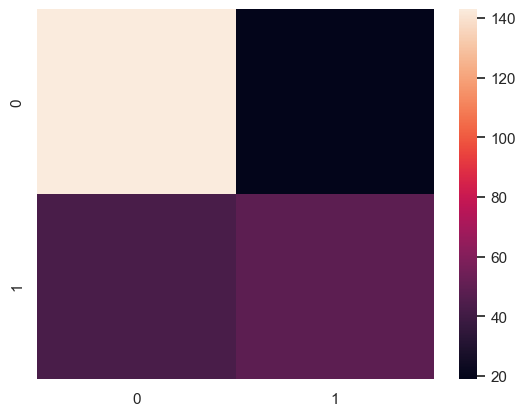

In [357]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

In [358]:
#Support Vector Machine(SVM)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [359]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [360]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [361]:
grid_result = grid_search.fit(X, y)

In [362]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

       False       0.77      0.92      0.84       162
        True       0.79      0.52      0.63        92

    accuracy                           0.78       254
   macro avg       0.78      0.72      0.73       254
weighted avg       0.78      0.78      0.76       254


 F1:
 0.6545454545454545

 Precision score is:
 0.7397260273972602

 Recall score is:
 0.5869565217391305

 Confusion Matrix:



<Axes: >

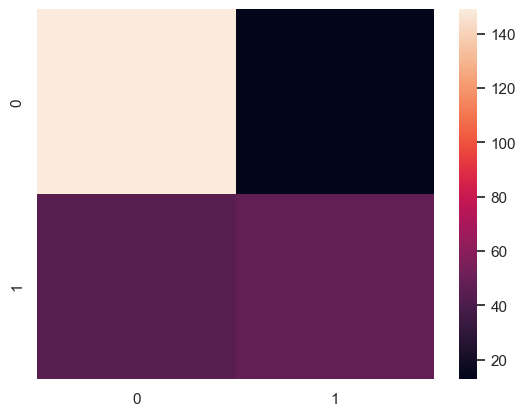

In [363]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

In [364]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [365]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [366]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [367]:
best_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [368]:
dt_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

       False       0.80      0.75      0.77       162
        True       0.60      0.66      0.63        92

    accuracy                           0.72       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.73      0.72      0.72       254


 F1:
 0.6321243523316062

 Precision score is:
 0.6039603960396039

 Recall score is:
 0.6630434782608695

 Confusion Matrix:



<Axes: >

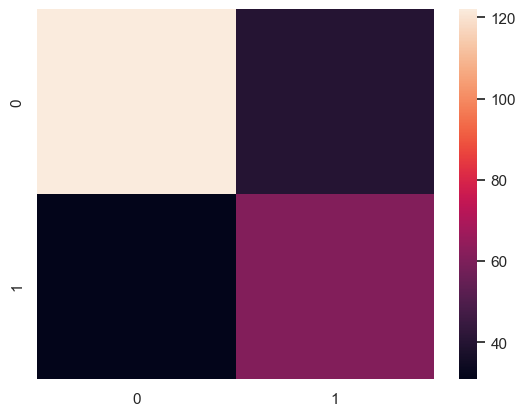

In [369]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

In [370]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [371]:
reg = LogisticRegression()
reg.fit(X_train,y_train)   

LogisticRegression()

In [372]:
LogisticRegression()

LogisticRegression()

In [373]:
lr_pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

       False       0.78      0.85      0.82       162
        True       0.69      0.59      0.64        92

    accuracy                           0.76       254
   macro avg       0.74      0.72      0.73       254
weighted avg       0.75      0.76      0.75       254


 F1:
 0.6352941176470588

 Precision score is:
 0.6923076923076923

 Recall score is:
 0.5869565217391305

 Confusion Matrix:



<Axes: >

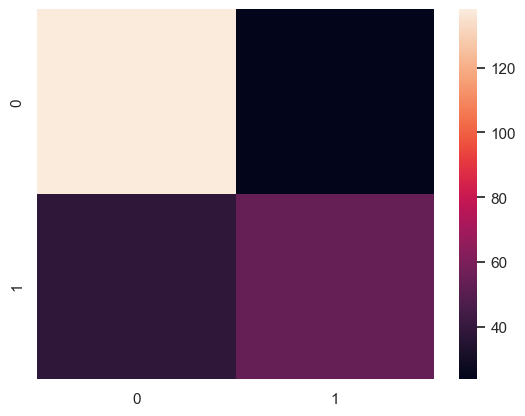

In [374]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

In [375]:
# Define individual models
rf_clf = RandomForestClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=19, p=2, metric='minkowski')  # Use tuned parameters if necessary
nb_clf = GaussianNB(var_smoothing=0.01)
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
dt_clf = DecisionTreeClassifier(random_state=42)
lr_clf = LogisticRegression()

In [376]:
# Create a VotingClassifier (with soft voting for probability-based aggregation)
voting_clf = VotingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('knn', knn_clf),
        ('naive_bayes', nb_clf),
        ('svm', svm_clf),
        ('decision_tree', dt_clf),
        ('logistic_regression', lr_clf)
    ],
    voting='soft'  # soft for probability-based voting
)

In [377]:
# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=19)),
                             ('naive_bayes', GaussianNB(var_smoothing=0.01)),
                             ('svm', SVC(probability=True)),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('logistic_regression', LogisticRegression())],
                 voting='soft')

In [378]:
# Predict and evaluate
y_pred = voting_clf.predict(X_test)

In [379]:
# Accuracy
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.3f}")


Overall Accuracy: 0.772


In [380]:
# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.88      0.83       162
        True       0.73      0.59      0.65        92

    accuracy                           0.77       254
   macro avg       0.76      0.73      0.74       254
weighted avg       0.77      0.77      0.77       254



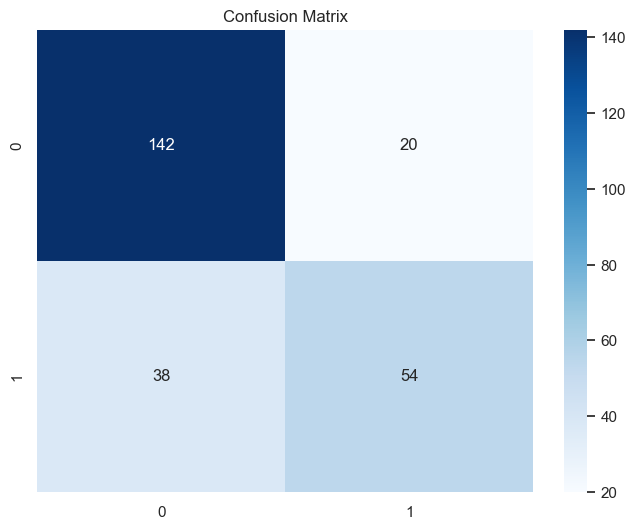

In [381]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

In [382]:
# F1, Precision, Recall
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")

F1 Score: 0.651
Precision: 0.730
Recall: 0.587
